<a href="https://colab.research.google.com/github/polymathkids/PythonSandbox/blob/main/Copy_of_PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting tool


cancer = datasets.load_breast_cancer()
cancer.target_names #'malignant' is represented by 0 and 'benign' by 1.

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X = cancer.data
y = cancer.target

# rescale the data so that every feature has mean 0 and standard deviation 1
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) #Fit to data, then transform it.

# compute the top two principal components of the dataset using PCA
# for every data point, compute its coordinates (i.e. projections)
# along these two principal components.

# Method 1 (Manual Calculation)
U, S, Vt = np.linalg.svd(scaled_X, full_matrices=False) #same as above in Prob 1
#print(scaled_X.shape, U.shape, S.shape, Vt.shape) #(569, 30) (569, 30) (30,) (30, 30)

# The rows of V^T = the principal directions (i.e.components) in the feature space
Vt_2 = Vt[:2, :] #grab first 2 rows of Vt for PCA1 and PCA2

X_pca_manual = np.dot(scaled_X,Vt_2.T)  # Project the scaled X data onto the first two principal components

Vt_3 = Vt[:3, :]  # Grab first 3 rows of Vt for PCA1, PCA2, and PCA3

X_pca_manual3 = np.dot(scaled_X, Vt_3.T)  # Project the scaled X data onto the first three principal components


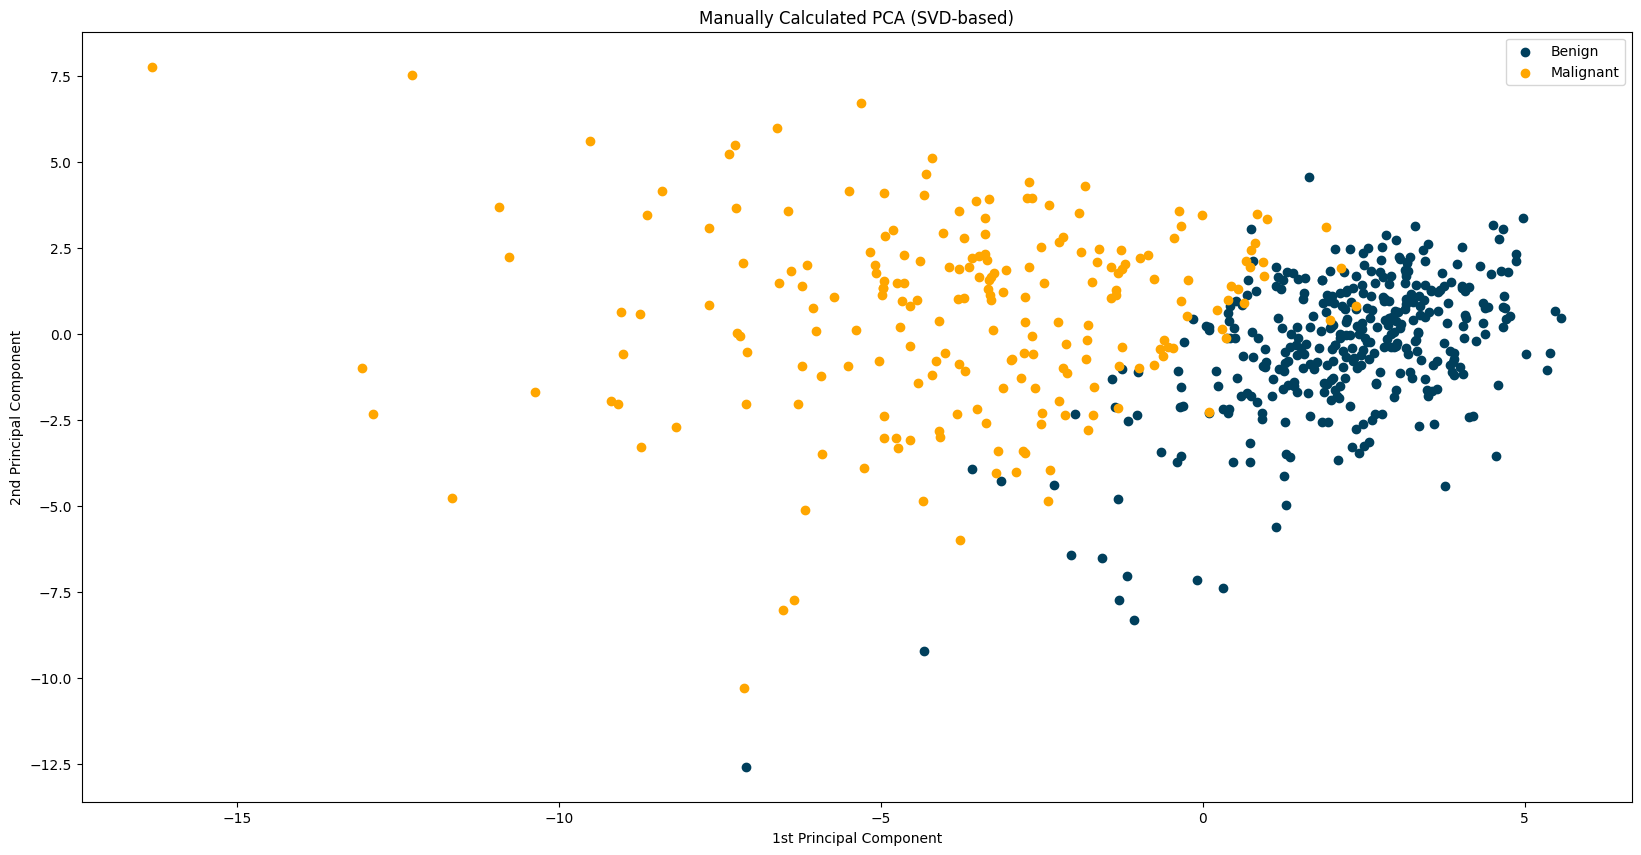

In [ ]:
#Plot 2D PCA
# make a scatterplot of the dataset in 2 dimensions
# the x-axis is the first principal component and the y-axis is the second
# Color the points by their diagnosis (malignant or benign)
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(20,10)) #same as above

# PCA - Manual
# Projection of data onto the first 2 principal components
x_benign = X_pca_manual[y ==1, 0] #select rows of X_pca_manual identified as benign (y=1) from 1st column which = 1st PCA component
y_benign = X_pca_manual[y==1, 1] #select rows of X_pca_manual identified as benign (y=1) from 2nd column which = 2nd PCA component
x_mal = X_pca_manual[y ==0, 0] #select rows of X_pca_manual identified as malignant (y=0) from 1st column which = 1st PCA component
y_mal = X_pca_manual[y==0, 1] #select rows of X_pca_manual identified as malignant (y=0) from 2nd column which = 2nd PCA component

axs.scatter(x = x_benign, y = y_benign, c='#003f5c', label='Benign')
axs.scatter(x = x_mal, y = y_mal, c='#ffa600', label='Malignant')
axs.set_title('Manually Calculated PCA (SVD-based)')
axs.set_xlabel('1st Principal Component')
axs.set_ylabel('2nd Principal Component')
axs.legend()

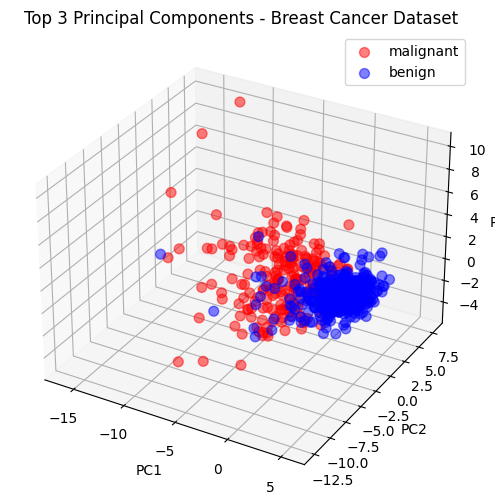

In [ ]:
#Plot 3D PCA
# Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Plot the data points in the 3D space of the top 3 PCs
# Color the points by the target value to see the data separation
ax.scatter(X_pca_manual3[y == 0, 0], X_pca_manual3[y == 0, 1], X_pca_manual3[y == 0, 2],
           color='r', label=cancer.target_names[0], s=50, alpha=0.5)
ax.scatter(X_pca_manual3[y == 1, 0], X_pca_manual3[y == 1, 1], X_pca_manual3[y == 1, 2],
           color='b', label=cancer.target_names[1], s=50, alpha=0.5)

# Labeling the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Legend
ax.legend()

# Title
ax.set_title('Top 3 Principal Components - Breast Cancer Dataset')

plt.show()

In [ ]:
# Assuming 'S' contains the singular values from the SVD you performed
total_variance = sum(S**2)
explained_variance = (S**2) / total_variance
explained_variance_ratio = explained_variance * 100  # Convert to percentage

# Now, print the percentage of variation captured by the top 3 principal components
print("Percentage of variation explained by the first 3 principal components:")
for i, variance in enumerate(explained_variance_ratio[:3], start=1):
    print(f"PC{i}: {variance:.2f}%")

Percentage of variation explained by the first 3 principal components:
PC1: 44.27%
PC2: 18.97%
PC3: 9.39%
